In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from run_gradient_em_attack import run_attack

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
main_folder = 'output/'
german_json_folder = os.path.join(main_folder, 'german', 'influence_data')
compas_json_folder = os.path.join(main_folder, 'compas', 'influence_data')
drug_json_folder = os.path.join(main_folder, 'drug',   'influence_data')

In [3]:
a = run_attack(total_grad_iter = 10000, dataset = "german", use_slab = True, epsilon = 0.5, lamb = 1, method = "IAF", stopping_method = "Parity", stop_after = 2, log_metrics = True, display_iter_time = True, eval_mode = True)

ATTACK METHOD IAF
EVAL MODE IS  True
epsilon: 0.5
use_slab: True
./data/german_data.npz
{1, -1}
male
female
152
761


2022-01-27 10:32:33.548389: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Total number of parameters: 59
MODEL CHECKPOINT NAME 
 output/german/influence_data/german_IAF_0.5_1.0_Parity-checkpoint
INFO:tensorflow:Restoring parameters from output/german/influence_data/german_IAF_0.5_1.0_Parity-checkpoint
Model output/german/influence_data/german_IAF_0.5_1.0_Parity-checkpoint loaded. Sanity checks ---
Train loss (w reg) on all data: 0.6154214
Train loss (w/o reg) on all data: 0.5602388
Test loss (w/o reg) on all data: 0.9635977
Train acc on all data:  0.7433333333333333
Test acc on all data:   0.575
******************Poison model parity bias on Test0.9793103448275862
******************Poison model EO bias on Test0.9777777777777777
Norm of the mean of gradients: 0.4248021
Norm of the params: 1.1073756
MODEL LOADED

RETURNING RESULTS 
 
{'loss': 0.6154214, 'loss_no_reg': 0.5602388, 'test_loss': 0.9635977, 'train_acc': 0.7433333333333333, 'test_acc

In [4]:
a

{'loss': 0.6154214,
 'loss_no_reg': 0.5602388,
 'test_loss': 0.9635977,
 'train_acc': 0.7433333333333333,
 'test_acc': 0.575,
 'grad_norm': 0.4248021,
 'params_norm': 1.1073756,
 'Parity': 0.9793103448275862,
 'E0': 0.9777777777777777}

Minimum accuracy:  0.51
Parity at the point of minimal accuracy:  0.8489970755733508
Actual maximal parity:  1.0


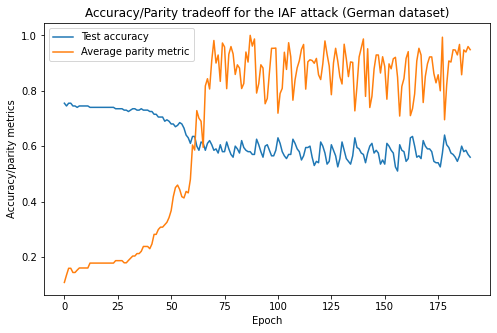

In [3]:
# Accuracy/Parity tradeoff depending on the epoch, for Parity based stopper, IAF attack
f = open(os.path.join(german_json_folder, 'german_IAF_0.5_1.0_Accuracy-checkpoint.json'))
data_parity_stopper = json.load(f)

fig, ax = plt.subplots(figsize=(8,5))
plt.title('Accuracy/Parity tradeoff for the IAF attack (German dataset)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/parity metrics')
plt.plot(data_parity_stopper['Accuracies'], label='Test accuracy')
plt.plot(data_parity_stopper['Average_Parities'], label='Average parity metric')
ax.legend()

# At the epoch with minimal accuracy, what is the value of the parity?
# What can be the actual maximal value of the parity?
min_acc_idx = int(np.where(data_parity_stopper['Accuracies']==np.min(data_parity_stopper['Accuracies']))[0])
parity_at_min_acc = data_parity_stopper['Average_Parities'][min_acc_idx]
print('Minimum accuracy: ', np.min(data_parity_stopper['Accuracies']))
print('Parity at the point of minimal accuracy: ', parity_at_min_acc)
print('Actual maximal parity: ', np.max(data_parity_stopper['Average_Parities']))

Minimum accuracy:  0.325
Parity at the point of minimal accuracy:  0.07331313676852096
Actual maximal parity:  0.24862962623350426


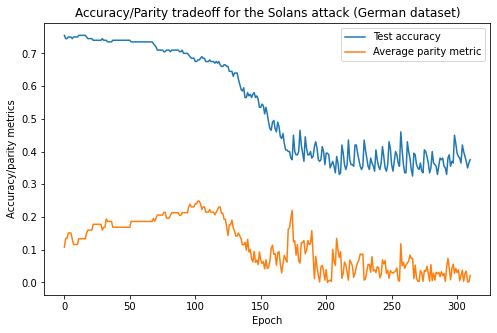

In [4]:
# Accuracy/Parity tradeoff depending on the epoch, for Parity based stopper, Solans attack
f = open(os.path.join(german_json_folder, 'german_Solans_0.5_1.0_Accuracy-checkpoint.json'))
data_parity_stopper = json.load(f)

fig, ax = plt.subplots(figsize=(8,5))
plt.title('Accuracy/Parity tradeoff for the Solans attack (German dataset)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/parity metrics')
plt.plot(data_parity_stopper['Accuracies'], label='Test accuracy')
plt.plot(data_parity_stopper['Average_Parities'], label='Average parity metric')
ax.legend()

# At the epoch with minimal accuracy, what is the value of the parity?
# What can be the actual maximal value of the parity?
min_acc_idx = int(np.where(data_parity_stopper['Accuracies']==np.min(data_parity_stopper['Accuracies']))[0])
parity_at_min_acc = data_parity_stopper['Average_Parities'][min_acc_idx]
print('Minimum accuracy: ', np.min(data_parity_stopper['Accuracies']))
print('Parity at the point of minimal accuracy: ', parity_at_min_acc)
print('Actual maximal parity: ', np.max(data_parity_stopper['Average_Parities']))

Minimum accuracy:  0.37422037422037424
Parity at the point of minimal accuracy:  0.1842176849777965
Actual maximal parity:  1.0


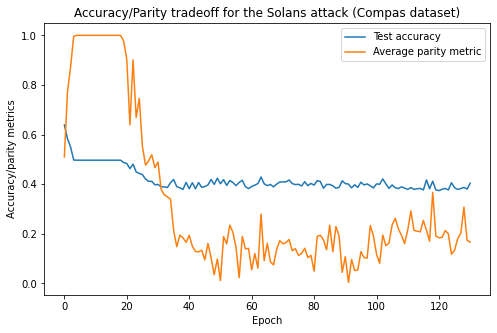

In [7]:
# Accuracy/Parity tradeoff depending on the epoch, for Parity based stopper, Solans attack
f = open(os.path.join(compas_json_folder, 'compas_Solans_0.5_1.0_Accuracy-checkpoint.json'))
data_parity_stopper = json.load(f)

fig, ax = plt.subplots(figsize=(8,5))
plt.title('Accuracy/Parity tradeoff for the Solans attack (Compas dataset)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/parity metrics')
plt.plot(data_parity_stopper['Accuracies'], label='Test accuracy')
plt.plot(data_parity_stopper['Average_Parities'], label='Average parity metric')
ax.legend()

# At the epoch with minimal accuracy, what is the value of the parity?
# What can be the actual maximal value of the parity?
min_acc_idx = int(np.where(data_parity_stopper['Accuracies']==np.min(data_parity_stopper['Accuracies']))[0])
parity_at_min_acc = data_parity_stopper['Average_Parities'][min_acc_idx]
print('Minimum accuracy: ', np.min(data_parity_stopper['Accuracies']))
print('Parity at the point of minimal accuracy: ', parity_at_min_acc)
print('Actual maximal parity: ', np.max(data_parity_stopper['Average_Parities']))

In [ ]:
# Different types of attacks. The last two are the baselines
method = ['IAF', 'RAA', 'NRAA', 'Koh', 'Solans']

# List of different datasets to use
dataset = ['german', 'compas', 'drug']

# List of hyperparameters
eps = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
lamb = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [ ]:
os.system("run_gradient_em_attack.py --total_grad_iter 10000 --dataset eval("compas") --use_slab --epsilon 0.5 --method eval("IAF") --sensitive_feature_idx 0 --sensitive_attr_filename eval("compas_group_label.npz") --arg1 {} --arg2 {}".format(a1, arg))

In [ ]:
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
lambdas =  [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
datasets = ["compas"]                # ["german", "compas", "drug"]
attacks =  ["IAF"]                   # ["IAF", "RAA", "RNAA", "Koh", "Solans"]
stopping_methods = ["Parity"]        # ["Parity", "Accuracy"]


for eps in epsilons: 
    for lamb in lambdas: 
        for dataset in datasets:
            for attack in attacks:
                for stopping_method in stopping_methods:

                    # Print run information in the terminal
                    print("\n============================================")
                    print(f"Run parameters: \n - Dataset: {dataset}\n - Attack: {attack}\n - Stopping method: {stopping_method}\n - Epsilon: {eps}, Lambda: {lamb}")
                    print("============================================")
                    
                    os.system(f"python -u run_gradient_em_attack.py --total_grad_iter 10000 --dataset {dataset} --use_slab --epsilon {eps} --lamb {lamb} --method {attack} --sensitive_attr_filename {dataset}_group_label.npz --stopping_method {stopping_methods} --stop_after 5\n")